In [30]:
%config IPCompleter.greedy=True
import pandas as pd

In [2]:
file_name = 'C:\\Users\\sgu194\\Desktop\\data\\ipl\\ipl-2017\\DIM_MATCH.csv'
matches = pd.read_csv(file_name)
# matches.columns

# matches.head()
# matches.tail()

# matches.info()
# matches.describe()
# matches[::20]
# len(matches)
# matches.shape

In [ ]:
# matches.columns

#['Match_SK', 'match_id', 'Team1', 'Team2', 'match_date', 'Season_Year', 
#        'Venue_Name', 'City_Name', 'Country_Name', 'Toss_Winner',
#        'match_winner', 'Toss_Name', 'Win_Type', 'Outcome_Type', 'ManOfMach',
#        'Win_Margin', 'Country_id']


# df2 = matches[['Team1', 'City_Name']].head()
# matches.Country_Name.head()

# matches.drop('Match_SK',axis=1)

# matches[matches.Season_Year > 2016]

# matches.City_Name.unique()
matches.Win_Margin.unique()

### Number of matches in each season ?

In [ ]:
matches.Season_Year.value_counts()

### Which city hosted higest number of matches ?

In [ ]:
# matches.groupby('City_Name').agg({'Match_SK' : 'count' })
ans1 = matches.groupby('City_Name')['Match_SK'].count()
ans1.sort_values(ascending=False)

### Find palyer who has been man of the match for most number of times in each year

In [ ]:
ss1 = matches.groupby(['Season_Year','ManOfMach']).size().reset_index(name='cnt')
ss2 = ss1.groupby('Season_Year')['cnt'].max().reset_index(name='cnt')
ss1.merge(ss2, on=['Season_Year','cnt'])
    
# ss1.groupby('Season_Year')['cnt'].max()


### what is day distribution of matches, match per day ?

In [ ]:
matches['match_date'].value_counts().hist()

In [ ]:
## Q2. what is relation of toss winning to winning matches for each team ?

c1 = matches.Team1.value_counts().reset_index(name = 'cnt1')
c2 = matches.Team2.value_counts().reset_index(name = 'cnt2')

m1 = c1.merge(c2, on='index')
m1['Total_match'] = m1['cnt1'] + m1['cnt2']
m1.drop(columns=['cnt1','cnt2'], axis=1,inplace=True)

matches[['Toss_Winner','match_winner']]

tw = matches['Toss_Winner'].value_counts().reset_index(name = 'Toss_Won')
mw = matches['match_winner'].value_counts().reset_index(name = 'Matches_Won')

sum1 = tw.merge(mw,on='index').merge(m1,on='index')

sum1['toss_percentage'] = sum1.Toss_Won/sum1.Total_match
sum1['win_percentage'] = sum1.Matches_Won/sum1.Total_match

sum1

In [ ]:
### Q3. for each team find higest and narrowest winning margin by wicket and runns.

In [ ]:
##Find summry of team per stadium - like how many matches played, won, lost


In [ ]:
import sys

### what is winning ratio team on its home ground ?
team_name = 'Kolkata Knight Riders'
home_ground = 'Kolkata'

hgm = matches[matches.City_Name == home_ground]
kkr = hgm[(matches['Team1'] == team_name) | (matches['Team2'] == team_name) ]
kkr['won'] = matches.apply(lambda row : 1 if row['match_winner'] == team_name else 0,axis=1 )

kkr.count()

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

c:\users\sgu194\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


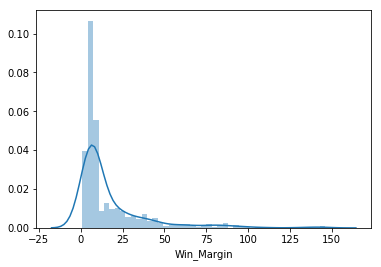

In [23]:
m1 = matches.dropna()

vis1 = sns.distplot(m1['Win_Margin'])

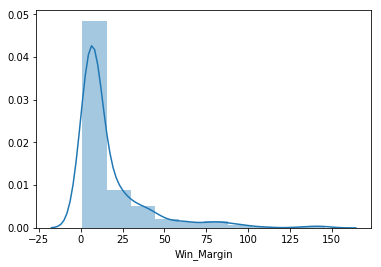

In [27]:
vis1 = sns.distplot(m1['Win_Margin'],bins=10)